In [120]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
Datos = pd.read_csv("./car data.csv") 

In [3]:
Datos.head(50)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
Datos.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

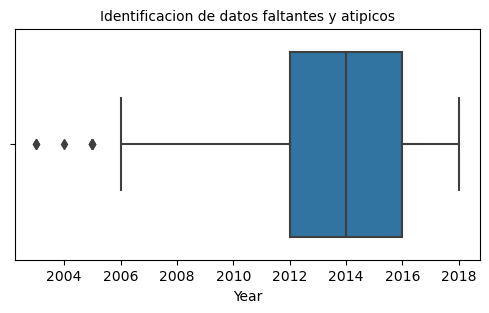

In [5]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos["Year"])
plt.title("Identificacion de datos faltantes y atipicos", fontsize=10 )

In [6]:
print("Cantidad de datos en cero en el precio presente:", Datos["Present_Price"].isin([0]).sum())
print("Cantidad de datos en cero en el precio de venta:", Datos["Selling_Price"].isin([0]).sum())
print("Cantidad de datos en cero en el año:", Datos["Year"].isin([0]).sum())
print("Cantidad de datos en cero en el Kilometraje:", Datos["Kms_Driven"].isin([0]).sum())

Cantidad de datos en cero en el precio presente: 0
Cantidad de datos en cero en el precio de venta: 0
Cantidad de datos en cero en el año: 0
Cantidad de datos en cero en el Kilometraje: 0


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

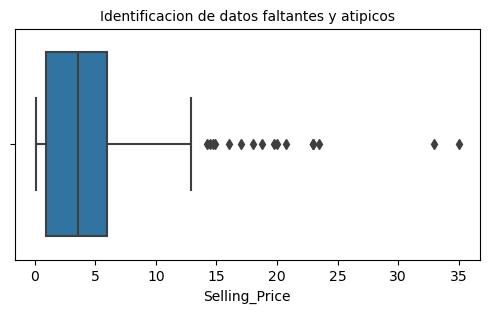

In [7]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos["Selling_Price"])
plt.title("Identificacion de datos faltantes y atipicos", fontsize=10 )

In [8]:
Min_PriceS = 0.1
Max_PriceS = 25
Total_atipicos=((Datos["Selling_Price"]<Min_PriceS)|(Datos["Selling_Price"]>Max_PriceS)).sum()
print("El total de numero atipicos es {}".format(Total_atipicos))

El total de numero atipicos es 2


In [9]:
Datos = Datos[(Datos["Selling_Price"] >= Min_PriceS) & (Datos["Selling_Price"] <= Max_PriceS)]

In [10]:
Total_atipicos=((Datos["Selling_Price"]<Min_PriceS)|(Datos["Selling_Price"]>Max_PriceS)).sum()
print("El total de numero atipicos es {}".format(Total_atipicos))

El total de numero atipicos es 0


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

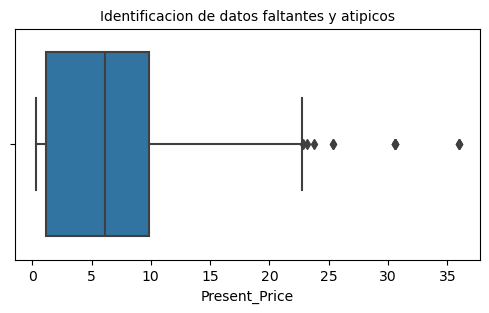

In [11]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos["Present_Price"])
plt.title("Identificacion de datos faltantes y atipicos", fontsize=10 )

In [12]:
Min_PriceP = 0.1
Max_PriceP = 40
Total_atipicos=((Datos["Present_Price"] <= Min_PriceP)|(Datos["Present_Price"] >= Max_PriceP)).sum()
print("El total de numero atipicos es {}".format(Total_atipicos))

El total de numero atipicos es 0


In [13]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [14]:
Datos["Selling_Price"].value_counts()

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
4.75     6
        ..
0.78     1
0.80     1
3.60     1
0.95     1
11.50    1
Name: count, Length: 154, dtype: int64

In [15]:
Datos["Selling_Price"].head(40)

0     3.35
1     4.75
2     7.25
3     2.85
4     4.60
5     9.25
6     6.75
7     6.50
8     8.75
9     7.45
10    2.85
11    6.85
12    7.50
13    6.10
14    2.25
15    7.75
16    7.25
17    7.75
18    3.25
19    2.65
20    2.85
21    4.90
22    4.40
23    2.50
24    2.90
25    3.00
26    4.15
27    6.00
28    1.95
29    7.45
30    3.10
31    2.35
32    4.95
33    6.00
34    5.50
35    2.95
36    4.65
37    0.35
38    3.00
39    2.25
Name: Selling_Price, dtype: float64

In [112]:
columnas_a_eliminar = ["Selling_Price", "Fuel_Type", "Seller_Type", "Car_Name", "Transmission"]
X = Datos.drop(columnas_a_eliminar, axis=1)
Y = Datos["Selling_Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [85]:
print(X_train)

     Year  Present_Price  Kms_Driven  Owner
260  2016         13.600       29223      0
37   2003          2.280      127000      0
99   2010         20.450       50024      0
193  2013          0.650       24000      1
137  2013          0.787       16000      0
..    ...            ...         ...    ...
253  2014          9.900       48000      0
194  2008          0.787       50000      0
119  2013          1.900        5400      0
47   2006          4.150       65000      0
174  2015          0.720       38600      0

[224 rows x 4 columns]


In [127]:
model_regresion = LinearRegression()
model_regresion.fit(X_train, Y_train)
prediccion = model_regresion.predict(X_test)

In [128]:
print(Y_test)

208    7.90
190    0.20
12     7.50
221    4.50
239    2.00
       ... 
158    0.48
228    4.95
274    5.30
27     6.00
146    0.55
Name: Selling_Price, Length: 75, dtype: float64


In [129]:
print(prediccion)

[ 6.54677465 -1.5455291   6.81276589  4.05741315  2.45058327  1.7882734
  5.41672114  4.03379806 13.27409603  2.4509772   4.55961875  7.25333778
 -0.4924112   2.79258403  3.86766345  4.66633236  4.11064572  4.90122362
  3.44718072  8.61996452 -3.1081339   2.25083681  2.35600734  1.38750478
  4.22842083  1.65959724 -7.81895417  4.96793915  7.85718031  5.54864454
 11.05395631 10.75587863  6.44881736  1.03892138  5.21285755  0.56937975
  0.86706296 -2.4578951   4.89043462  7.91640377  6.6531386   9.51042922
 16.59150651  4.95514377  7.07958023  1.67720722  3.93364757  4.29992569
  5.77061449  7.72296105  4.93862252  4.82128914 -0.74470701  2.11830626
 21.47993574  9.70494909  0.57955309  3.19159234  6.29133686  2.05443357
  1.20568631  0.84134149 21.72564701  4.37850838  5.74871089  5.53950223
  4.31692157  1.82214077  3.46686376  2.48207248  2.0121605   4.87807614
  4.60893563  5.41835143  1.08046637]


In [131]:
mse = mean_squared_error(Y_test, prediccion)
print("Error Cuadrático Medio (MSE):", mse)
rmse = mean_squared_error(Y_test, prediccion, squared=False)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
r2 = r2_score(Y_test, prediccion)
print("Coeficiente de Determinación (R-squared):", r2)

Error Cuadrático Medio (MSE): 3.667493467553767
Raíz del Error Cuadrático Medio (RMSE): 1.9150700946842043
Coeficiente de Determinación (R-squared): 0.8446210472379629


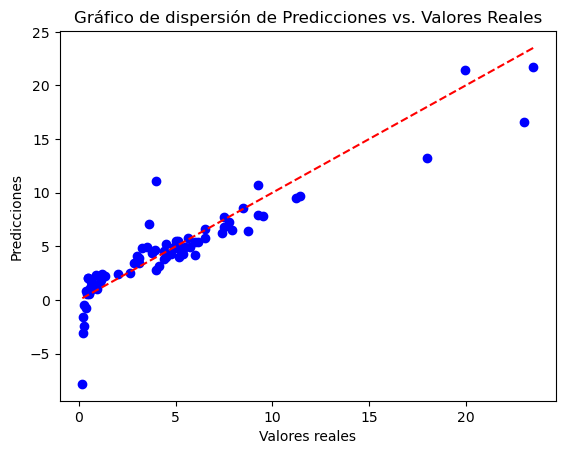

In [133]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de las predicciones vs. los valores reales
plt.scatter(Y_test, prediccion, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')  # Línea de 45 grados para referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión de Predicciones vs. Valores Reales')
plt.show()